# USAir97
Network of American football games between Division IA colleges during regular season Fall 2000. Please cite M. Girvan and M. E. J. Newman, Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

In [1]:
import urllib.request
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
import numpy as np
import itertools

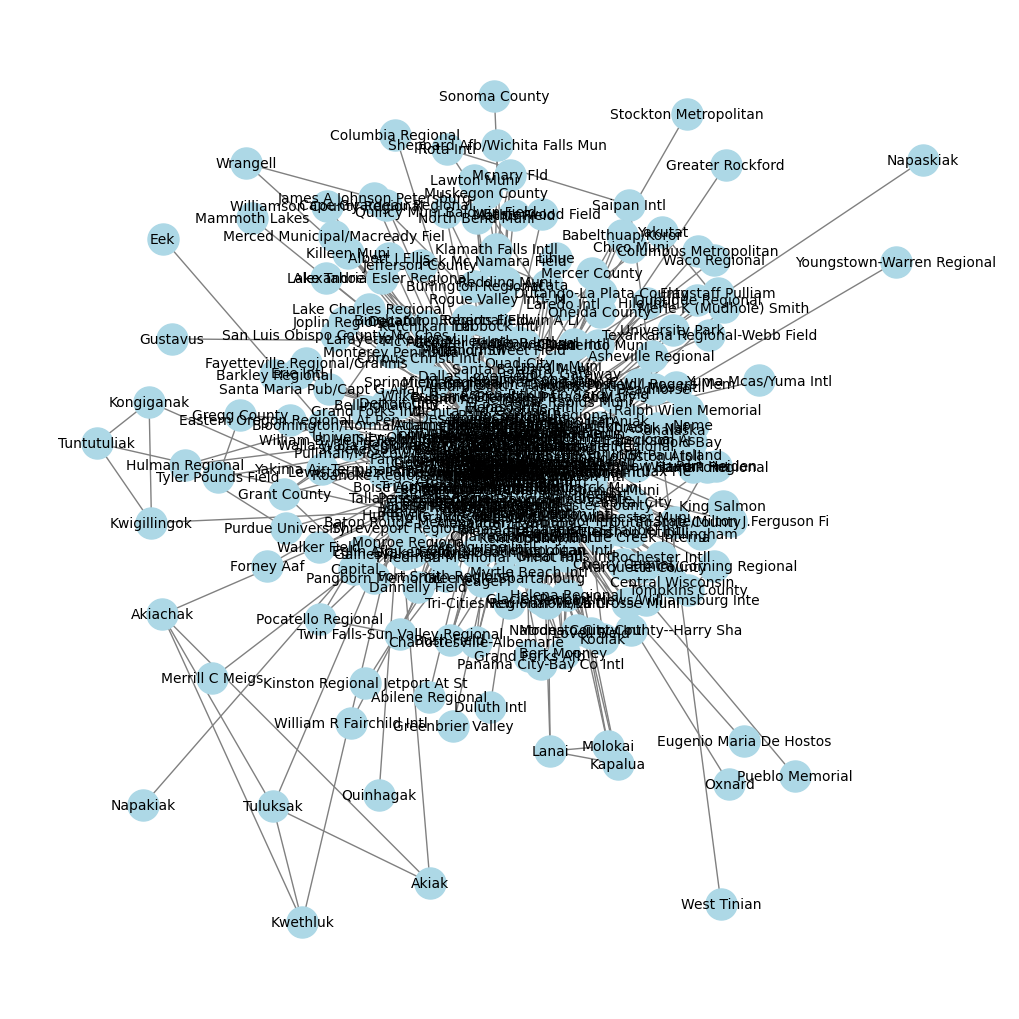

In [2]:
# Descargar el archivo
url = "http://vlado.fmf.uni-lj.si/pub/networks/data/mix/USAir97.net"
filename = "USAir97.net"
urllib.request.urlretrieve(url, filename)

# Cargar la red
G = nx.read_pajek(filename)
G = nx.Graph(G)

# Dibujar la red
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.show()

## Network Characteristics.

In [3]:
# Medidas de las características de la red
size_of_network = G.number_of_nodes()
number_of_links = G.number_of_edges()
average_path_length = nx.average_shortest_path_length(G)
clustering_coefficient = nx.average_clustering(G)
average_distance = average_path_length  # En redes conectadas, la distancia promedio es el promedio del camino más corto
diameter = nx.diameter(G)
radius = nx.radius(G)
eccentricity = nx.eccentricity(G)
periphery = nx.periphery(G)
center = nx.center(G)

# Mostrar los resultados
print(f"Size of the Network: {size_of_network}")
print(f"Number of Links: {number_of_links}")
print(f"Average Path Length: {average_path_length:.2f}")
print(f"Clustering Coefficient: {clustering_coefficient:.2f}")
print(f"Average Distance: {average_distance:.2f}")
print(f"Diameter: {diameter}")
print(f"Radius: {radius}")
print(f"Eccentricity: {eccentricity}")
print(f"Periphery: {periphery}")
print(f"Center: {center}")

Size of the Network: 332
Number of Links: 2126
Average Path Length: 2.74
Clustering Coefficient: 0.63
Average Distance: 2.74
Diameter: 6
Radius: 3
Eccentricity: {'Wiley Post-Will Rogers Mem': 5, 'Deadhorse': 5, 'Ralph Wien Memorial': 5, 'Fairbanks Intl': 5, 'Nome': 5, "St Mary's": 5, 'Aniak': 5, 'Anchorage Intl': 4, 'Tuluksak': 6, 'Akiachak': 6, 'Akiak': 6, 'Kwethluk': 6, 'Bethel': 5, 'Napaskiak': 6, 'Napakiak': 6, 'Merle K (Mudhole) Smith': 5, 'Tuntutuliak': 6, 'Eek': 6, 'Kongiganak': 6, 'Kwigillingok': 6, 'Quinhagak': 6, 'Yakutat': 6, 'Dillingham': 5, 'King Salmon': 5, 'Gustavus': 6, 'Juneau Intl': 5, 'Kodiak': 5, 'St Paul Island': 5, 'Sitka': 5, 'Port Heiden': 5, 'James A Johnson Petersburg': 6, 'Wrangell': 6, 'Ketchikan Intl': 5, 'Sand Point': 5, 'Cold Bay': 5, 'Unalaska': 5, 'Eareckson As': 5, 'Adak Naf': 5, 'Bellingham Intl': 5, 'Glacier Park Intl': 6, 'Minot Intl': 5, 'William R Fairchild Intl': 5, 'Grand Forks Afb': 5, 'Grand Forks Intl': 5, 'Spokane Intl': 5, 'Great Falls Intl

## Centrality Measure.

In [4]:
# Calcular las medidas de centralidad
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
katz_centrality = nx.katz_centrality_numpy(G, alpha=0.1, beta=1.0)
pagerank = nx.pagerank(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Función para mostrar los 10 nodos principales por centralidad
def print_top_10(centrality_dict, centrality_name):
    sorted_centrality = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)[:10]
    print(f"Top 10 nodes by {centrality_name}:")
    for node, centrality in sorted_centrality:
        print(f"{node}: {centrality:.4f}")
    print("\n")

### Degree Centrality

In [5]:
print_top_10(degree_centrality, "Degree Centrality")


Top 10 nodes by Degree Centrality:
Chicago O'hare Intl: 0.4199
Dallas/Fort Worth Intl: 0.3565
The William B Hartsfield Atlan: 0.3051
Pittsburgh Intll: 0.2840
Lambert-St Louis Intl: 0.2840
Charlotte/Douglas Intl: 0.2628
Stapleton Intl: 0.2568
Minneapolis-St Paul Intl/Wold-: 0.2356
Detroit Metropolitan Wayne Cou: 0.2115
San Francisco Intl: 0.2054




### Eigenvector Centrality

In [6]:
print_top_10(eigenvector_centrality, "Eigenvector Centrality")


Top 10 nodes by Eigenvector Centrality:
Chicago O'hare Intl: 0.2112
Dallas/Fort Worth Intl: 0.1946
The William B Hartsfield Atlan: 0.1918
Lambert-St Louis Intl: 0.1795
Pittsburgh Intll: 0.1787
Charlotte/Douglas Intl: 0.1730
Detroit Metropolitan Wayne Cou: 0.1681
Minneapolis-St Paul Intl/Wold-: 0.1641
Stapleton Intl: 0.1617
Newark Intl: 0.1616




### Katz Centrality

In [7]:
print_top_10(katz_centrality, "Katz Centrality")


Top 10 nodes by Katz Centrality:
Seattle-Tacoma Intl: 0.1912
Portland Intl: 0.1729
San Francisco Intl: 0.1338
Spokane Intl: 0.1322
Anchorage Intl: 0.1224
Washington Dulles Intl: 0.1110
Greater Buffalo Intl: 0.1105
Boise Air Terminal /Gowen Fld/: 0.1103
Tri-Cities: 0.1068
John F Kennedy Intl: 0.1065




### PageRank

In [8]:
print_top_10(pagerank, "PageRank")


Top 10 nodes by PageRank:
Chicago O'hare Intl: 0.0360
Dallas/Fort Worth Intl: 0.0317
San Francisco Intl: 0.0231
Seattle-Tacoma Intl: 0.0226
Minneapolis-St Paul Intl/Wold-: 0.0223
The William B Hartsfield Atlan: 0.0221
Anchorage Intl: 0.0216
Stapleton Intl: 0.0212
Los Angeles Intl: 0.0208
Lambert-St Louis Intl: 0.0205




### Betweenness Centrality

In [9]:
print_top_10(betweenness_centrality, "Betweenness Centrality")

Top 10 nodes by Betweenness Centrality:
Chicago O'hare Intl: 0.2083
Anchorage Intl: 0.1701
Dallas/Fort Worth Intl: 0.1532
San Francisco Intl: 0.0942
Seattle-Tacoma Intl: 0.0928
Lambert-St Louis Intl: 0.0815
The William B Hartsfield Atlan: 0.0715
Pittsburgh Intll: 0.0693
Honolulu Intl: 0.0681
Bethel: 0.0653




### Closeness Centrality

In [10]:
print_top_10(closeness_centrality, "Closeness Centrality")

Top 10 nodes by Closeness Centrality:
Chicago O'hare Intl: 0.6073
Dallas/Fort Worth Intl: 0.5544
Minneapolis-St Paul Intl/Wold-: 0.5400
The William B Hartsfield Atlan: 0.5356
San Francisco Intl: 0.5330
Lambert-St Louis Intl: 0.5288
Seattle-Tacoma Intl: 0.5262
Stapleton Intl: 0.5246
Los Angeles Intl: 0.5246
Detroit Metropolitan Wayne Cou: 0.5237




## Degree Distribution.

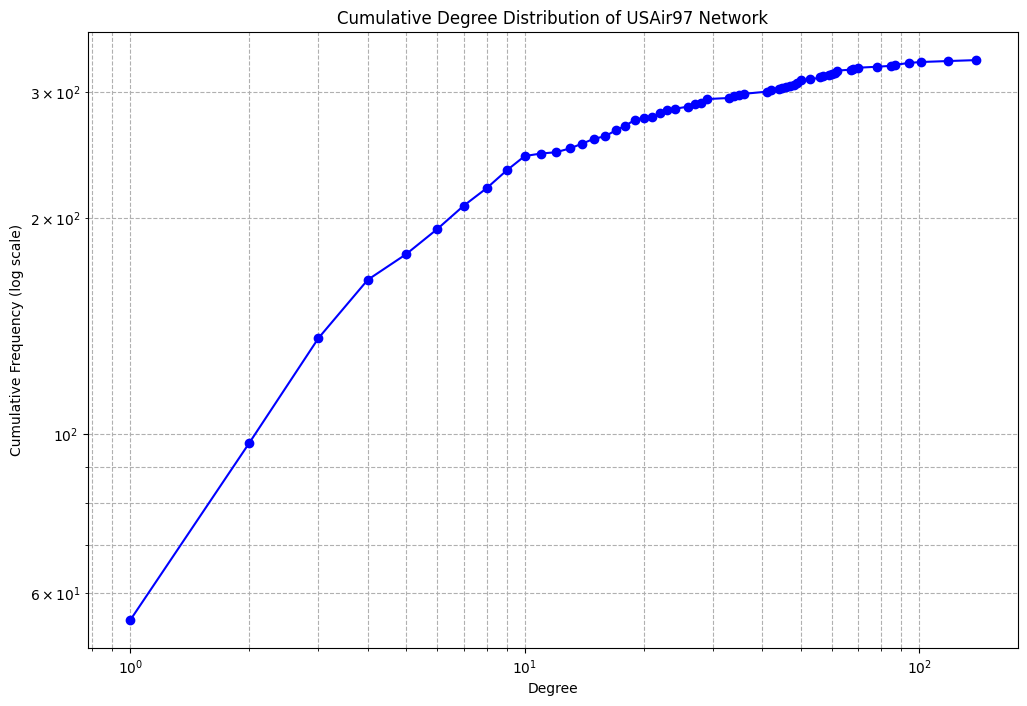

In [11]:
# Calcular la distribución de grados
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # lista de grados ordenada

# Contar la frecuencia de cada grado
degree_count = {}
for degree in degree_sequence:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1

# Calcular la distribución acumulativa
degrees = np.array(list(degree_count.keys()))
frequencies = np.array(list(degree_count.values()))
cumulative_frequencies = np.cumsum(frequencies[::-1])[::-1]

# Crear el gráfico de línea acumulativa
plt.figure(figsize=(12, 8))
plt.plot(degrees, cumulative_frequencies, marker='o', linestyle='-', color='b')

plt.title("Cumulative Degree Distribution of USAir97 Network")
plt.xlabel("Degree")
plt.ylabel("Cumulative Frequency (log scale)")
plt.yscale('log')  # Usar escala logarítmica para el eje y para mejorar la visualización
plt.xscale('log')  # Usar escala logarítmica para el eje x para mejorar la visualización

plt.grid(True, which="both", ls="--")
plt.show()

## Community Detection

In [12]:
# Aplicar el algoritmo de Girvan-Newman
comp = girvan_newman(G)

# Calcular la modularidad para cada iteración de comunidades
modularity_values = []
communities_list = []

for communities in itertools.islice(comp, G.number_of_nodes() - 1):
    communities_list.append(communities)
    modularity_values.append(nx.community.modularity(G, communities))

# Encontrar el número de comunidades con la modularidad máxima
optimal_index = modularity_values.index(max(modularity_values))
optimal_communities = communities_list[optimal_index]
optimal_number_of_communities = len(optimal_communities)

print(f"El número óptimo de comunidades es: {optimal_number_of_communities}")

El número óptimo de comunidades es: 103


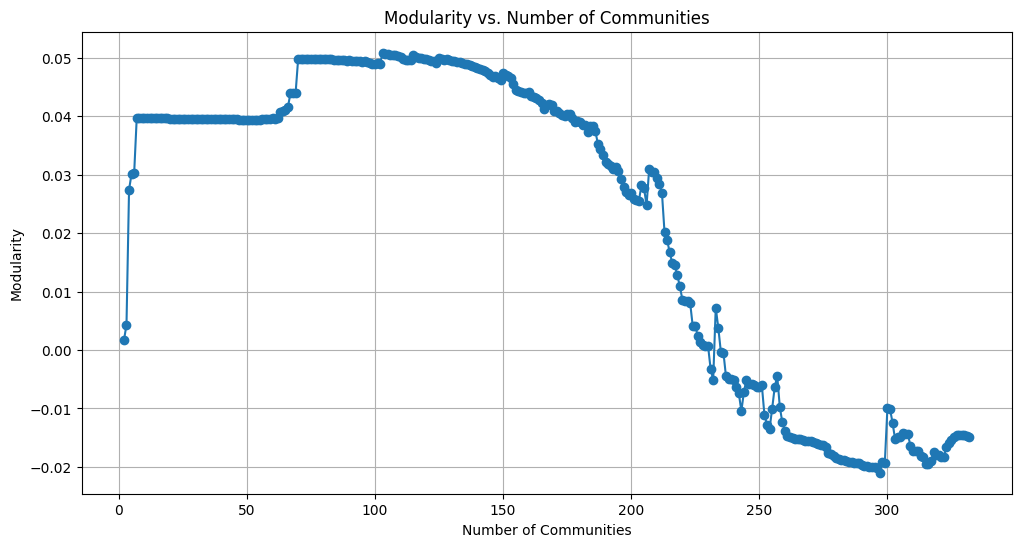

In [13]:
# Graficar la modularidad en función del número de comunidades
plt.figure(figsize=(12, 6))
plt.plot(range(2, len(modularity_values) + 2), modularity_values, marker='o')
plt.xlabel('Number of Communities')
plt.ylabel('Modularity')
plt.title('Modularity vs. Number of Communities')
plt.grid(True)
plt.show()

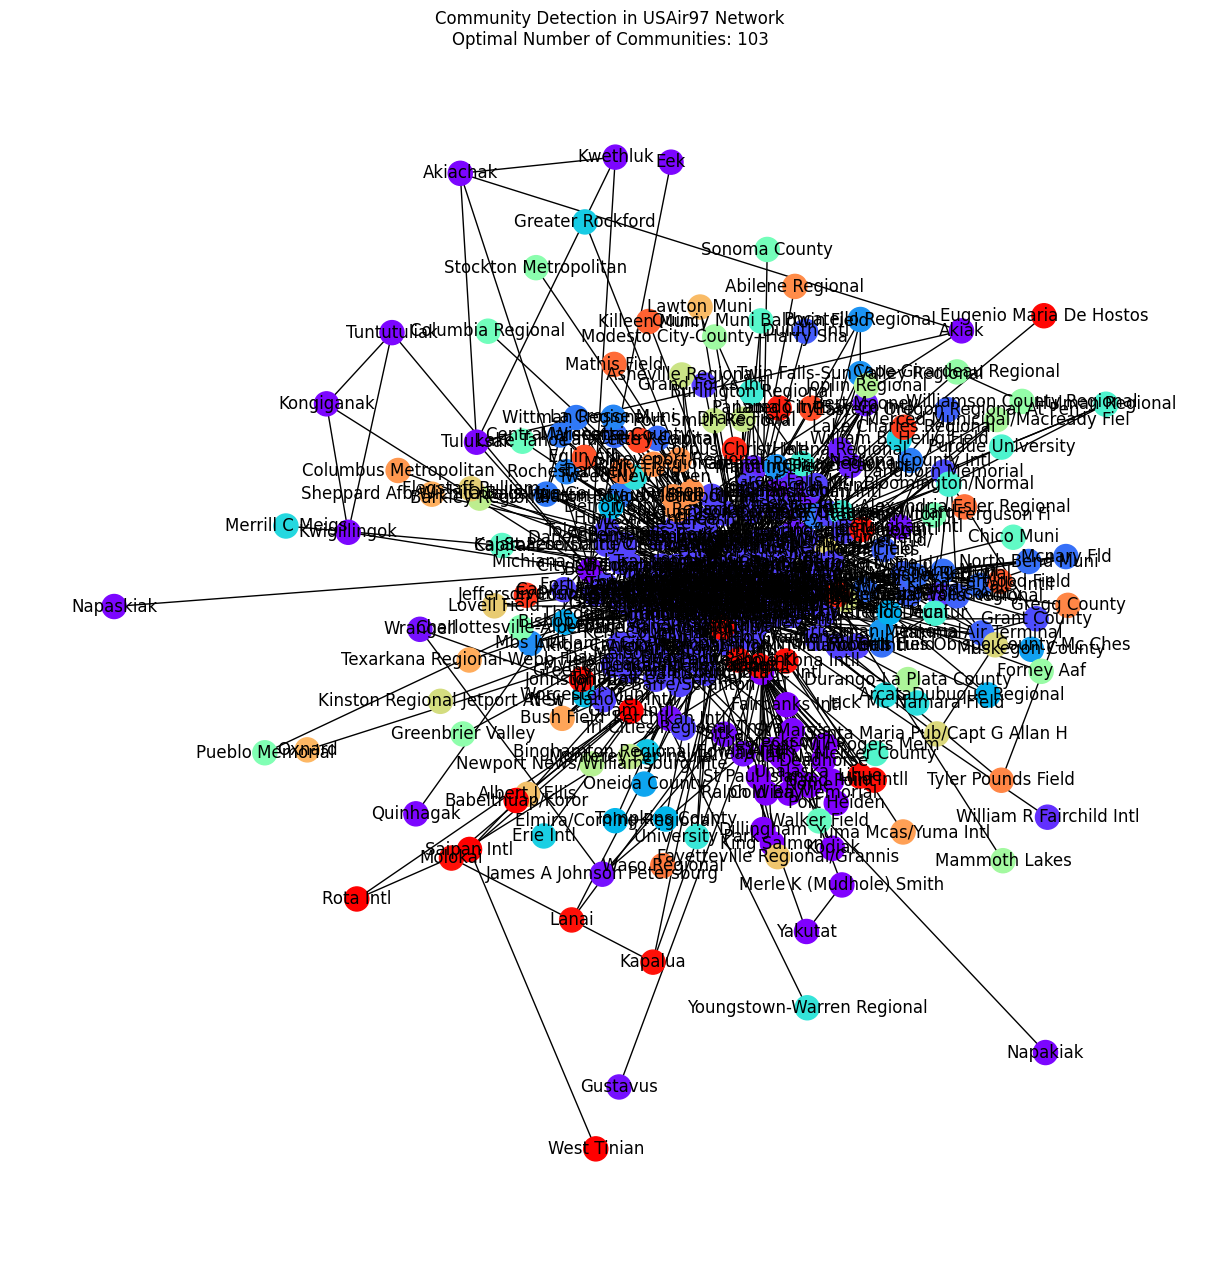

In [14]:
# Crear un diccionario de nodos con su respectiva comunidad
community_map = {}
for i, community in enumerate(optimal_communities):
    for node in community:
        community_map[node] = i

# Dibujar la red con los nodos coloreados según su comunidad
pos = nx.spring_layout(G)  # Posiciones de los nodos para la visualización
plt.figure(figsize=(12, 12))

colors = [community_map[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True, node_size=300, cmap=plt.cm.rainbow)

plt.title(f"Community Detection in USAir97 Network\nOptimal Number of Communities: {optimal_number_of_communities}")
plt.show()
